In [20]:
import pandas as pd
import os

Generate Full Candidate Profiles

In [ ]:
# Step 1: Import packages
import pandas as pd
import os
import csv  # Required for safe quoting

# Step 2: File paths
base_path = os.path.join(".", "Candidate_Dataset")
print("Folder contents:", os.listdir(base_path))

files = {
    "candidates": "candidates.csv",
    "skills": "skills.csv",
    "experience": "experience.csv",
    "projects": "projects.csv",
    "education": "education.csv",
    "certifications": "licenses_certifications.csv",
    "publications": "publications.csv",
    "honors": "honors_awards.csv",
    "volunteer": "volunteer.csv"
}

# Step 3: Read all CSVs
data = {
    name: pd.read_csv(os.path.join(base_path, fname), encoding="latin1")
    for name, fname in files.items()
}

# Step 4: Build structured profiles
profiles = []

for _, candidate in data["candidates"].iterrows():
    cid = candidate["Candidate_ID"]
    name = candidate.get("Candidate_Name", f"Candidate_{cid}")

    def format_block(title, df):
        if df.empty:
            return f"{title}: None"
        rows = df.to_dict(orient="records")
        joined = " | ".join(
            ["; ".join([f"{k}: {str(v).strip()}" for k, v in row.items() if pd.notna(v)]) for row in rows]
        )
        return f"{title}: {joined}"

    # Get info blocks
    skills_list = data["skills"][data["skills"]["Candidate_ID"] == cid]["Skill_Name"].tolist()
    skills = f"Skills: {', '.join(skills_list)}" if skills_list else "Skills: None"

    experience = format_block("Experience", data["experience"][data["experience"]["Candidate_ID"] == cid])
    education = format_block("Education", data["education"][data["education"]["Candidate_ID"] == cid])
    certifications = format_block("Certifications", data["certifications"][data["certifications"]["Candidate_ID"] == cid])
    projects = format_block("Projects", data["projects"][data["projects"]["Candidate_ID"] == cid])
    publications = format_block("Publications", data["publications"][data["publications"]["Candidate_ID"] == cid])
    honors = format_block("Honors & Awards", data["honors"][data["honors"]["Candidate_ID"] == cid])
    volunteer = format_block("Volunteer", data["volunteer"][data["volunteer"]["Candidate_ID"] == cid])

    # Construct full profile
    full_profile = ". ".join([experience,projects,publications,education,certifications,skills,honors,volunteer])
    full_profile = full_profile.replace("\n", " ").replace("\r", " ").strip()
    full_profile = ' '.join(full_profile.split())  # Remove extra spaces

    profiles.append({
        "Candidate_ID": cid,
        "Candidate_Name": name,
        "Full_Profile": full_profile
    })

# Step 5: Export clean profile CSV
output_df = pd.DataFrame(profiles)
output_path = os.path.join(base_path, "candidates_profiles.csv")
output_df.to_csv(output_path, index=False, encoding='utf-8', quoting=csv.QUOTE_ALL)

print(f"candidates_profiles.csv generated successfully at: {output_path}")


Folder contents: ['candidates.csv', 'education.csv', 'experience.csv', 'honors_awards.csv', 'licenses_certifications.csv', 'projects.csv', 'publications.csv', 'recommandations.csv', 'skills.csv', 'volunteer.csv']
✅ candidates_profiles.csv generated successfully at: .\Candidate_Dataset\candidates_profiles.csv


'# Step 1: File paths\nimport pandas as pd\nimport os\n\n#Step 1: Correct file paths\nbase_path = os.path.join(".", "Candidate_Dataset")\nprint("Folder contents:", os.listdir(base_path))\nfiles = {\n    "candidates": "candidates.csv",\n    "skills": "skills.csv",\n    "experience": "experience.csv",\n    "projects": "projects.csv",\n    "education": "education.csv",\n    "certifications": "licenses_certifications.csv",\n    "publications": "publications.csv",\n    "honors": "honors_awards.csv",\n    "volunteer": "volunteer.csv"\n}\n\n# Step 2: Read all CSV files safely\ndata = {\n    name: pd.read_csv(os.path.join(base_path, fname), encoding="latin1")\n    for name, fname in files.items()\n}\n\n#Step 3: Combine all professional data into profiles\nprofiles = []\nfor _, candidate in data["candidates"].iterrows():\n    cid = candidate["Candidate_ID"]\n    name = candidate.get("Candidate_Name", f"Candidate_{cid}")\n\n    def format_block(title, df):\n        rows = df.to_dict(orient="reco

Candidate Profiles Cleaning:-

Remove Less Relevant Information: 
General details not clearly tied to professional competencies or relevant roles (such as extensive location details, descriptions of institutions, generic extracurricular activities, etc.).

Consolidate and Normalize Skills:
Clearly list core skills without repetitions, remove highly generic skills (e.g., "Research Skills", "Teamwork", unless specifically relevant).

Example:
Retain: "Skills: Python, Machine Learning, AWS, Docker"
Remove: "Team player, hardworking, enthusiastic"


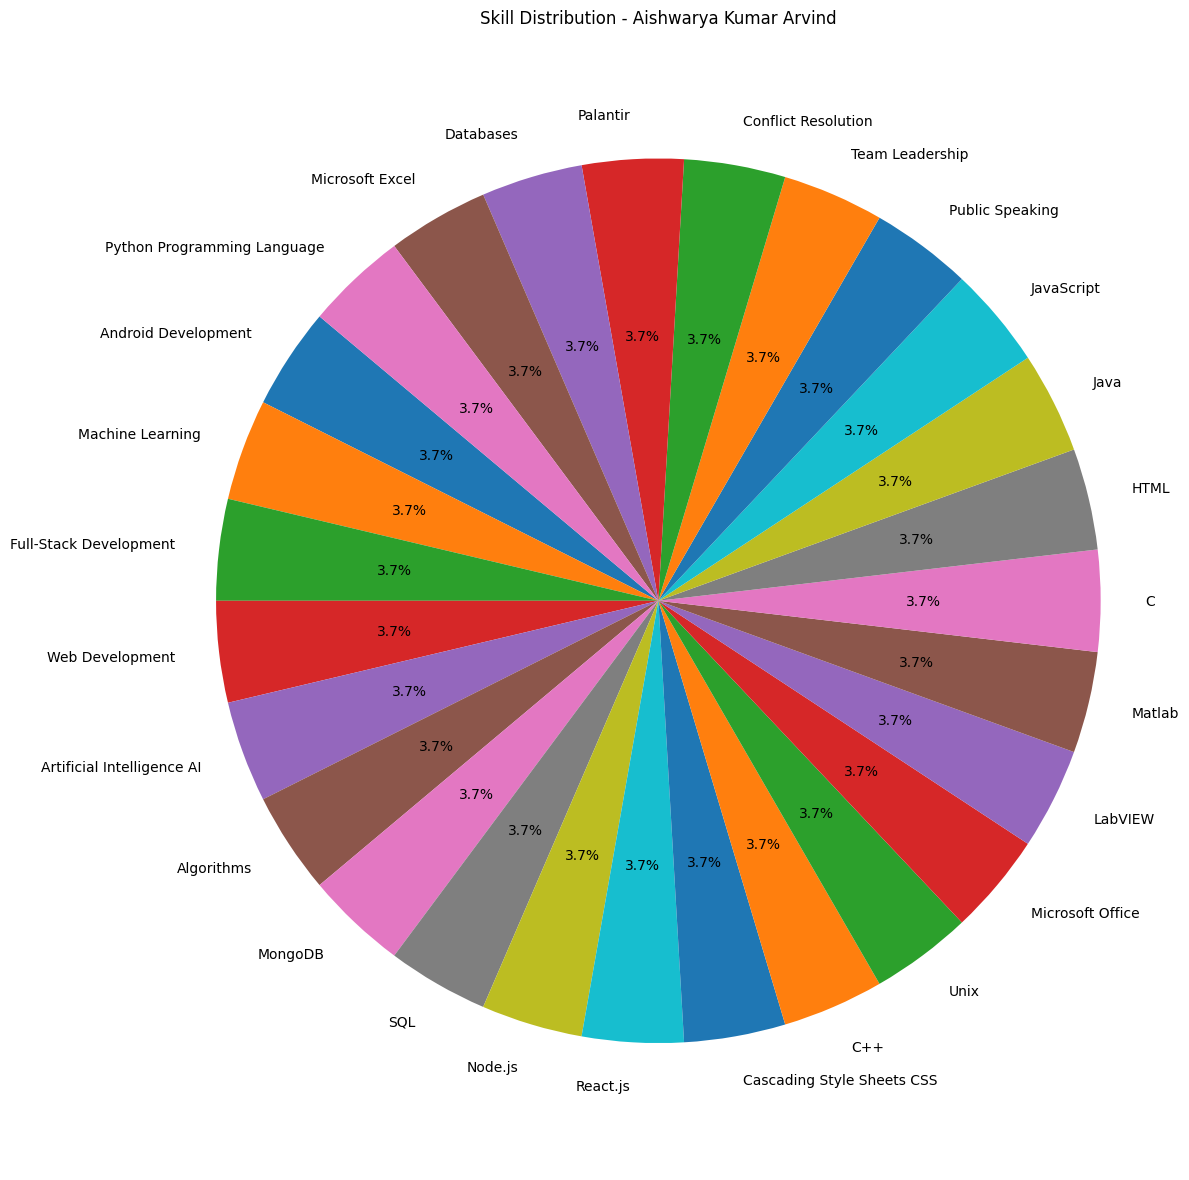

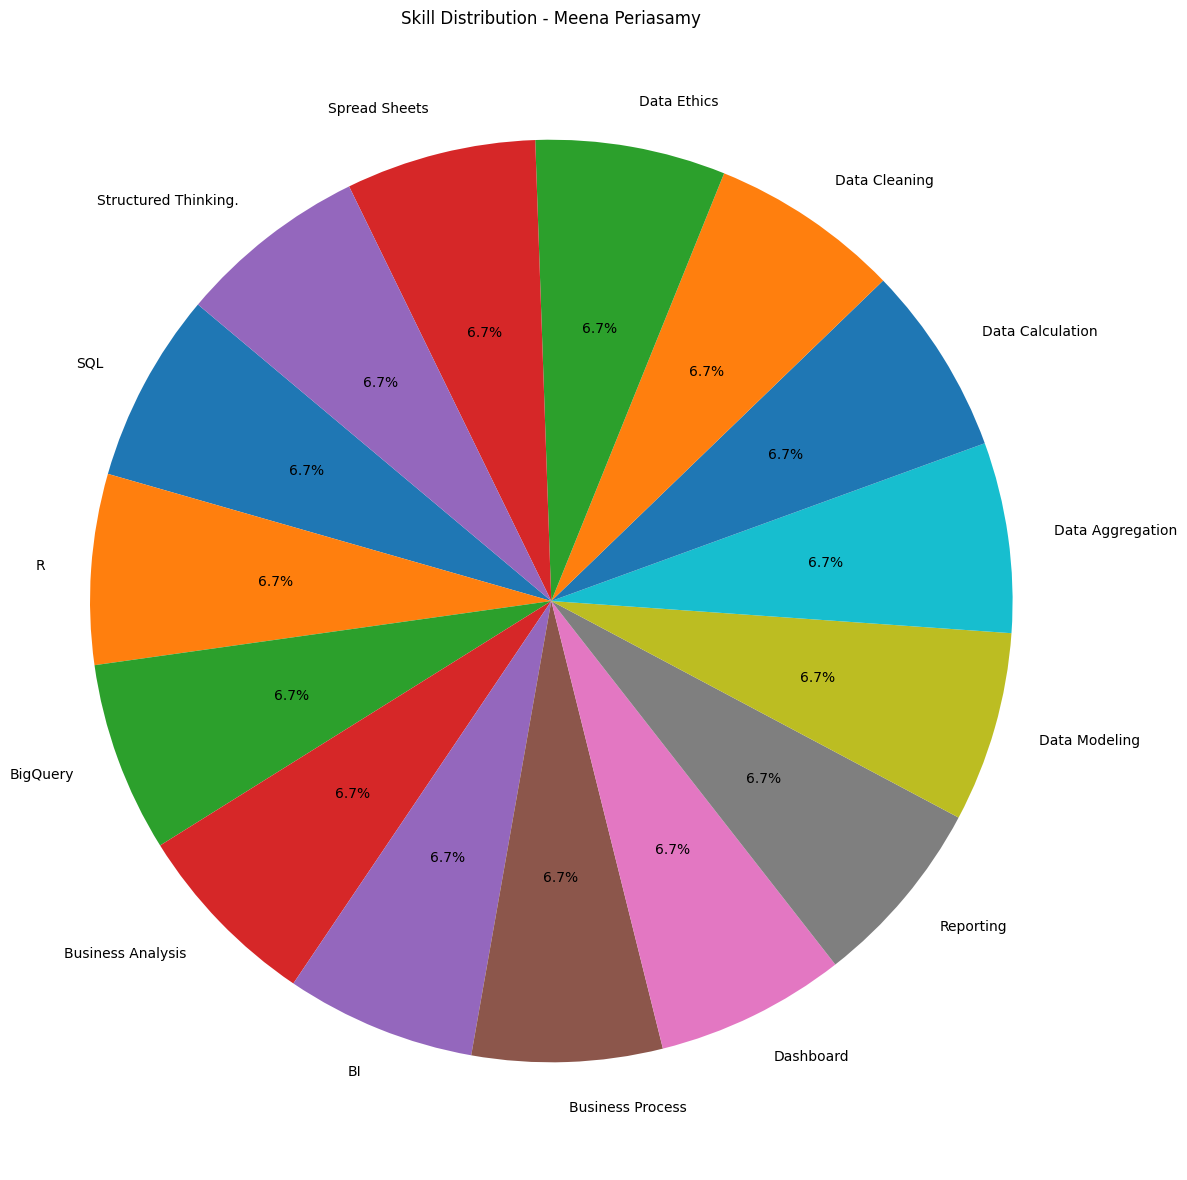

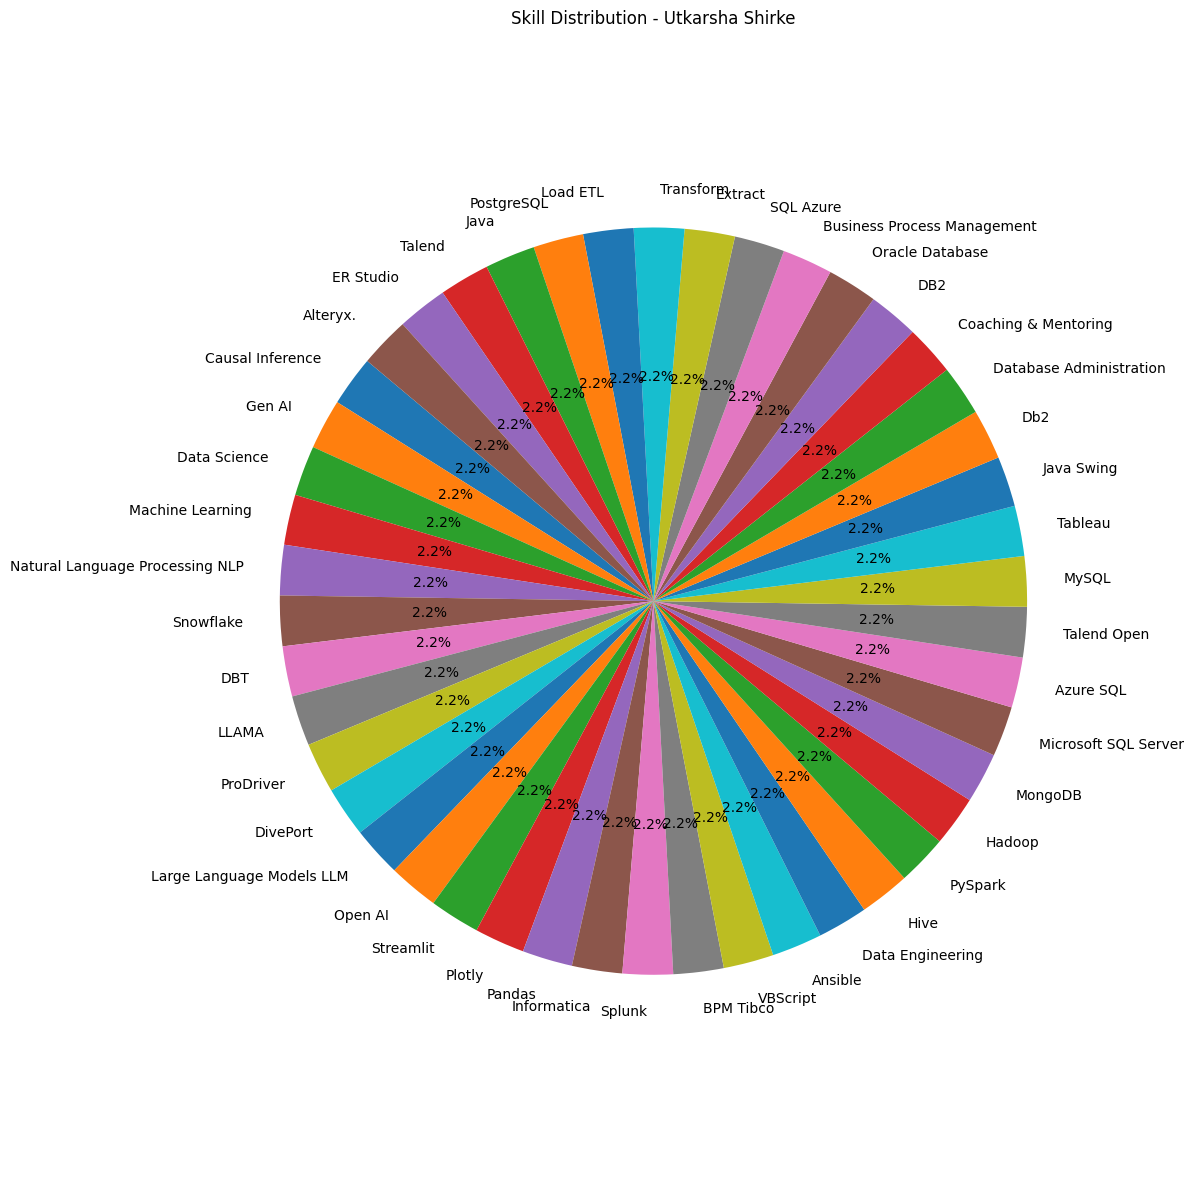

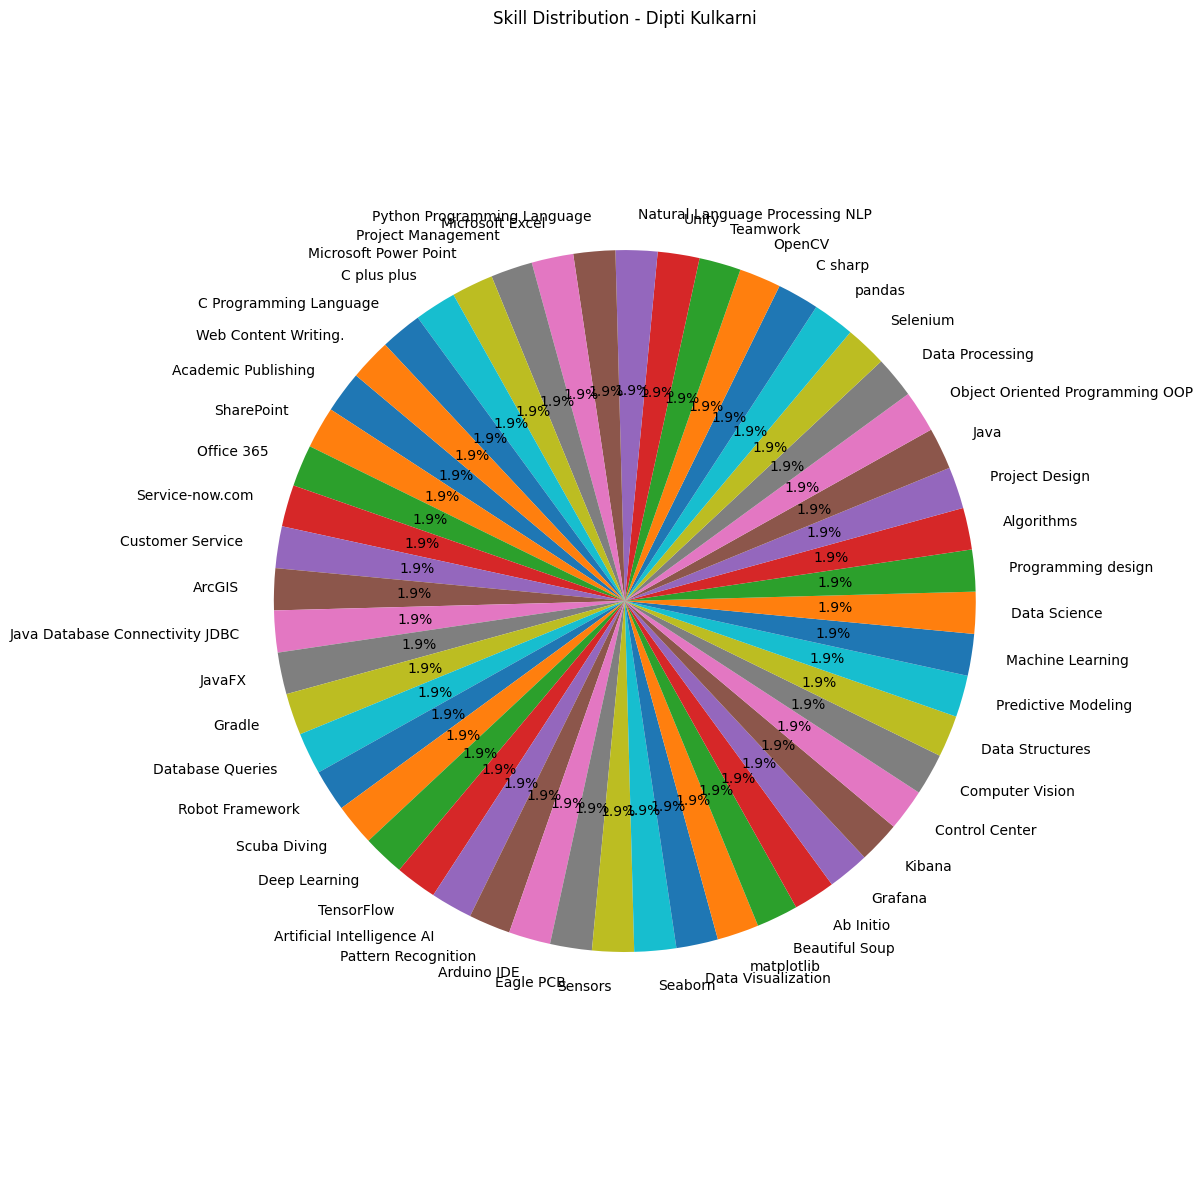

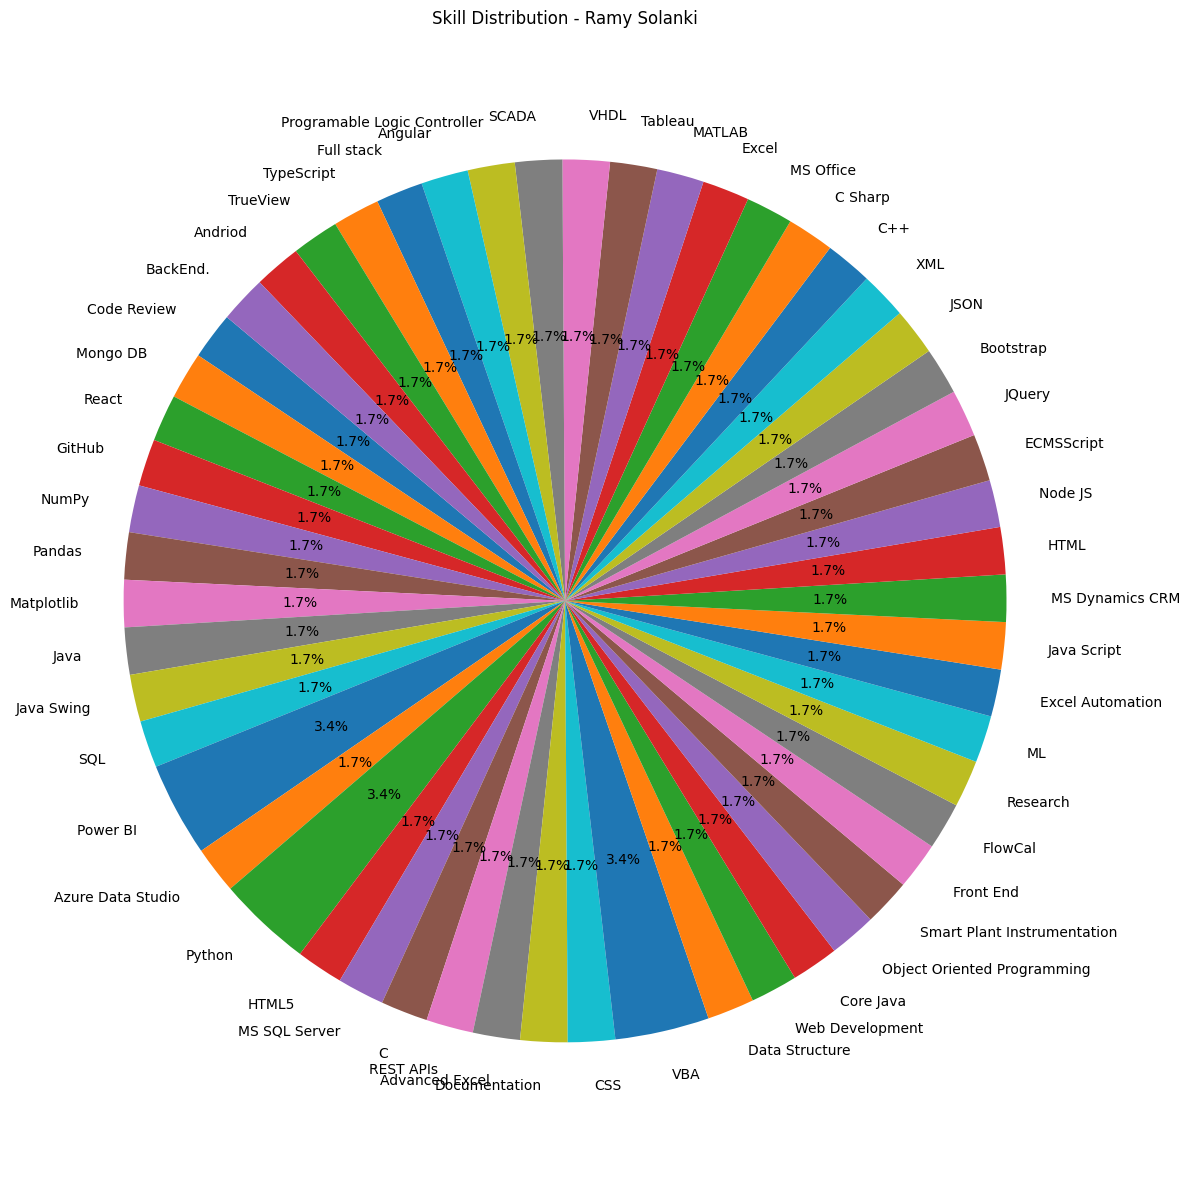

No skills found for Akshath Kamath. Skipping...


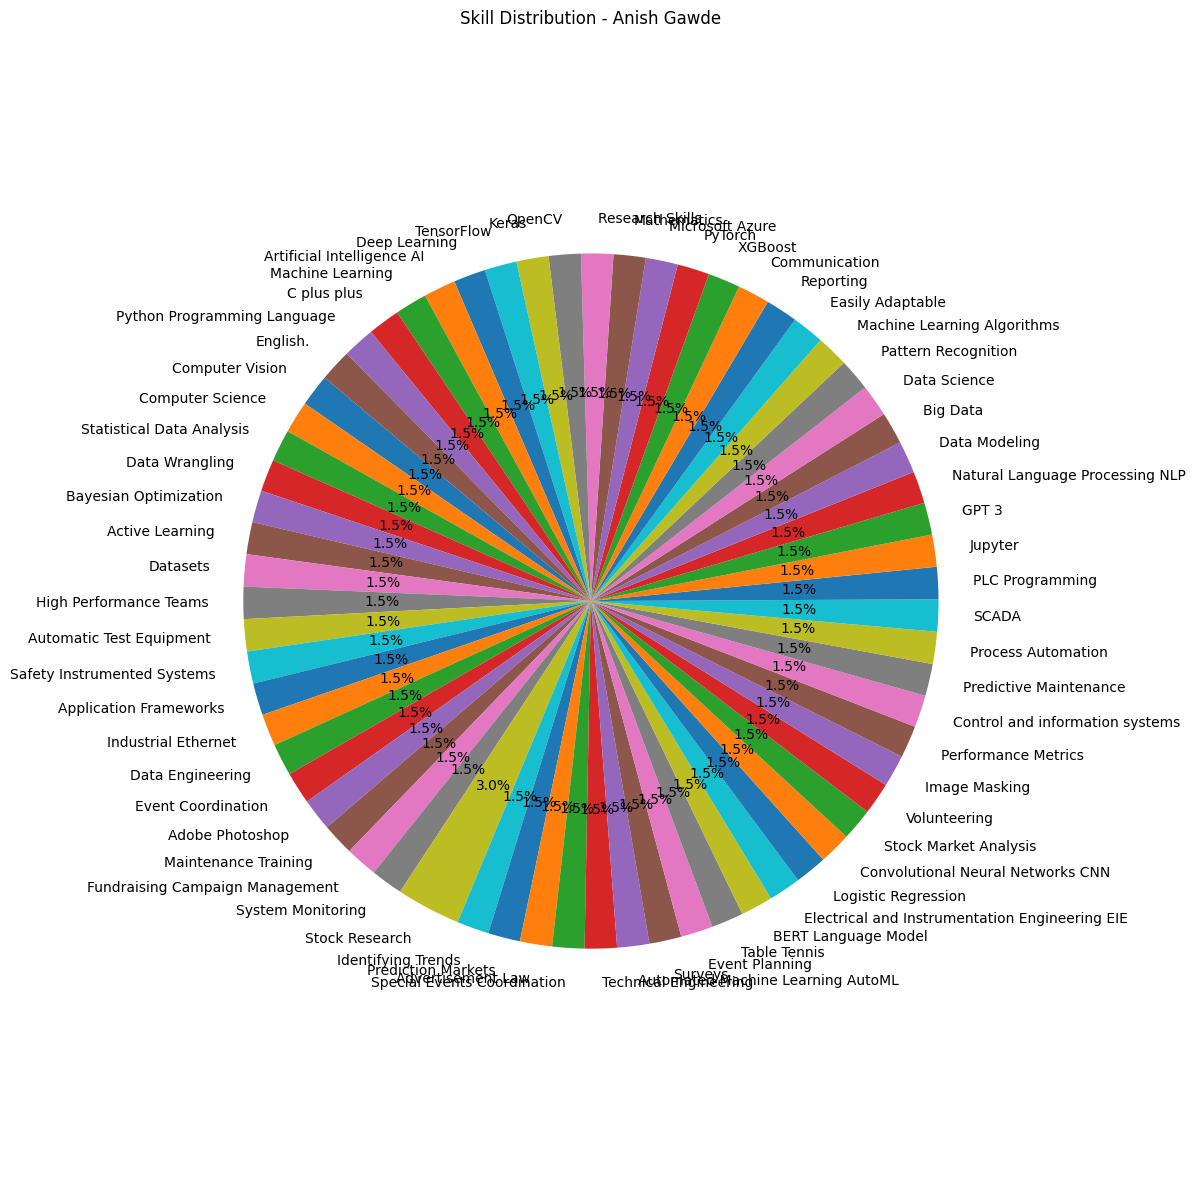

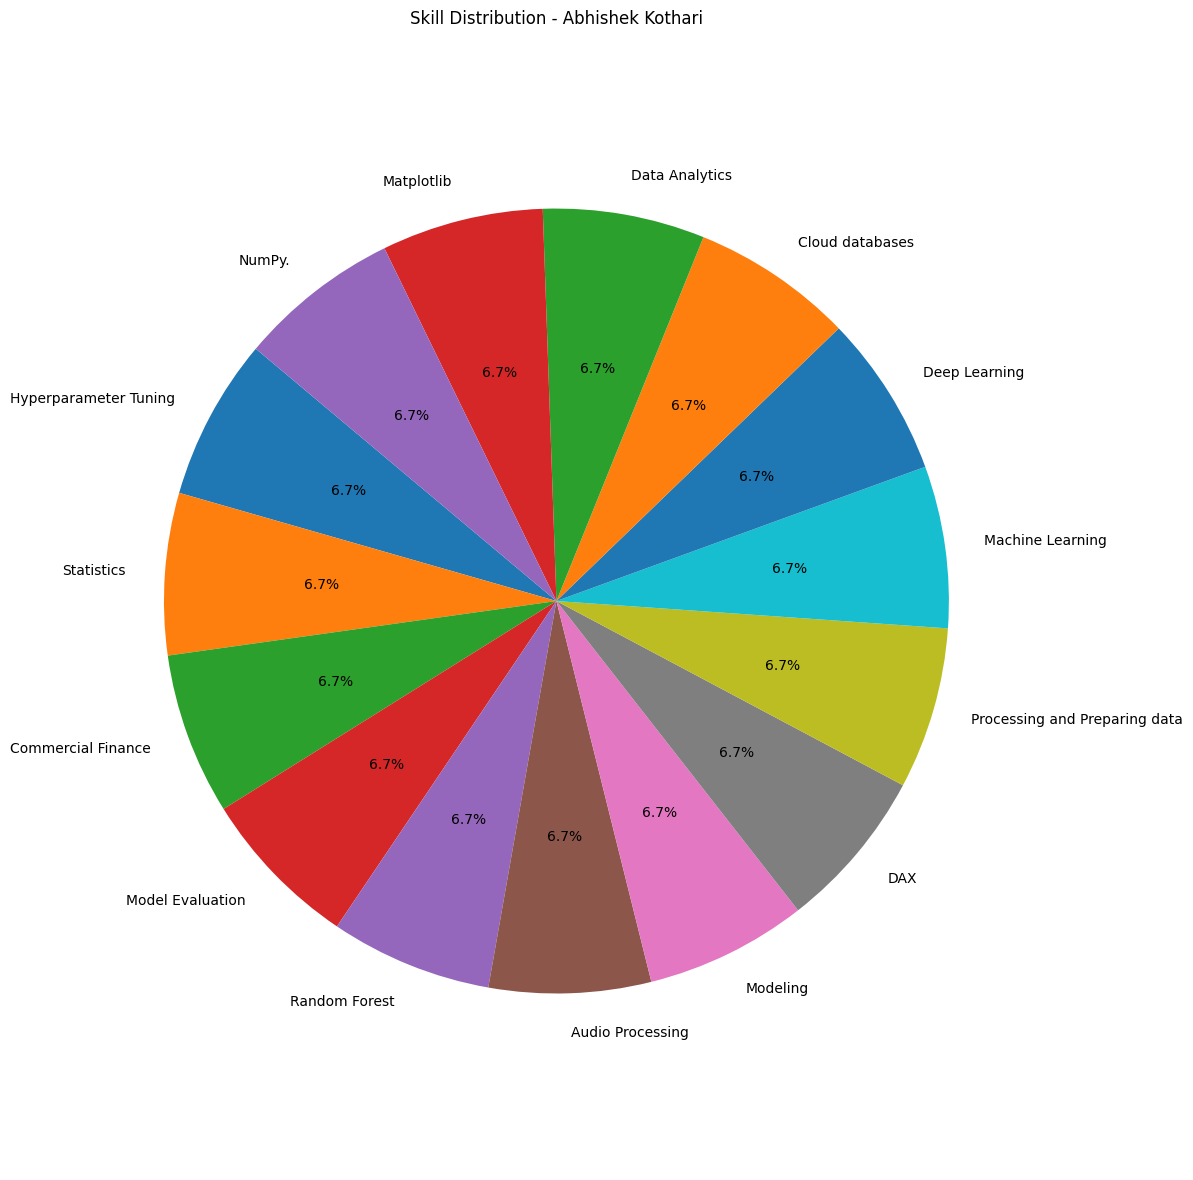

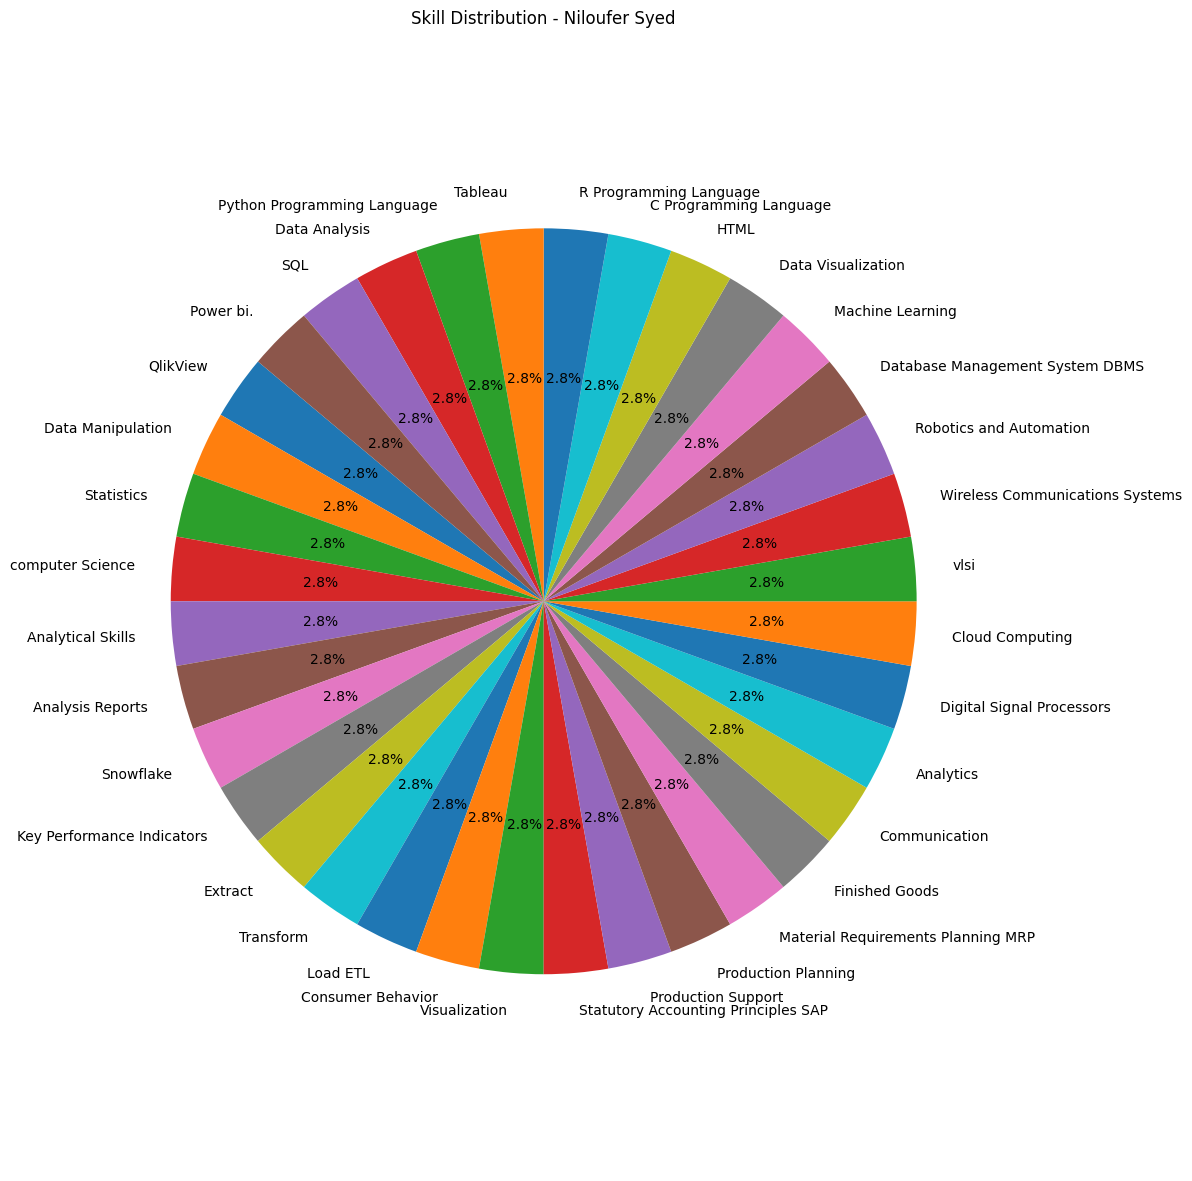

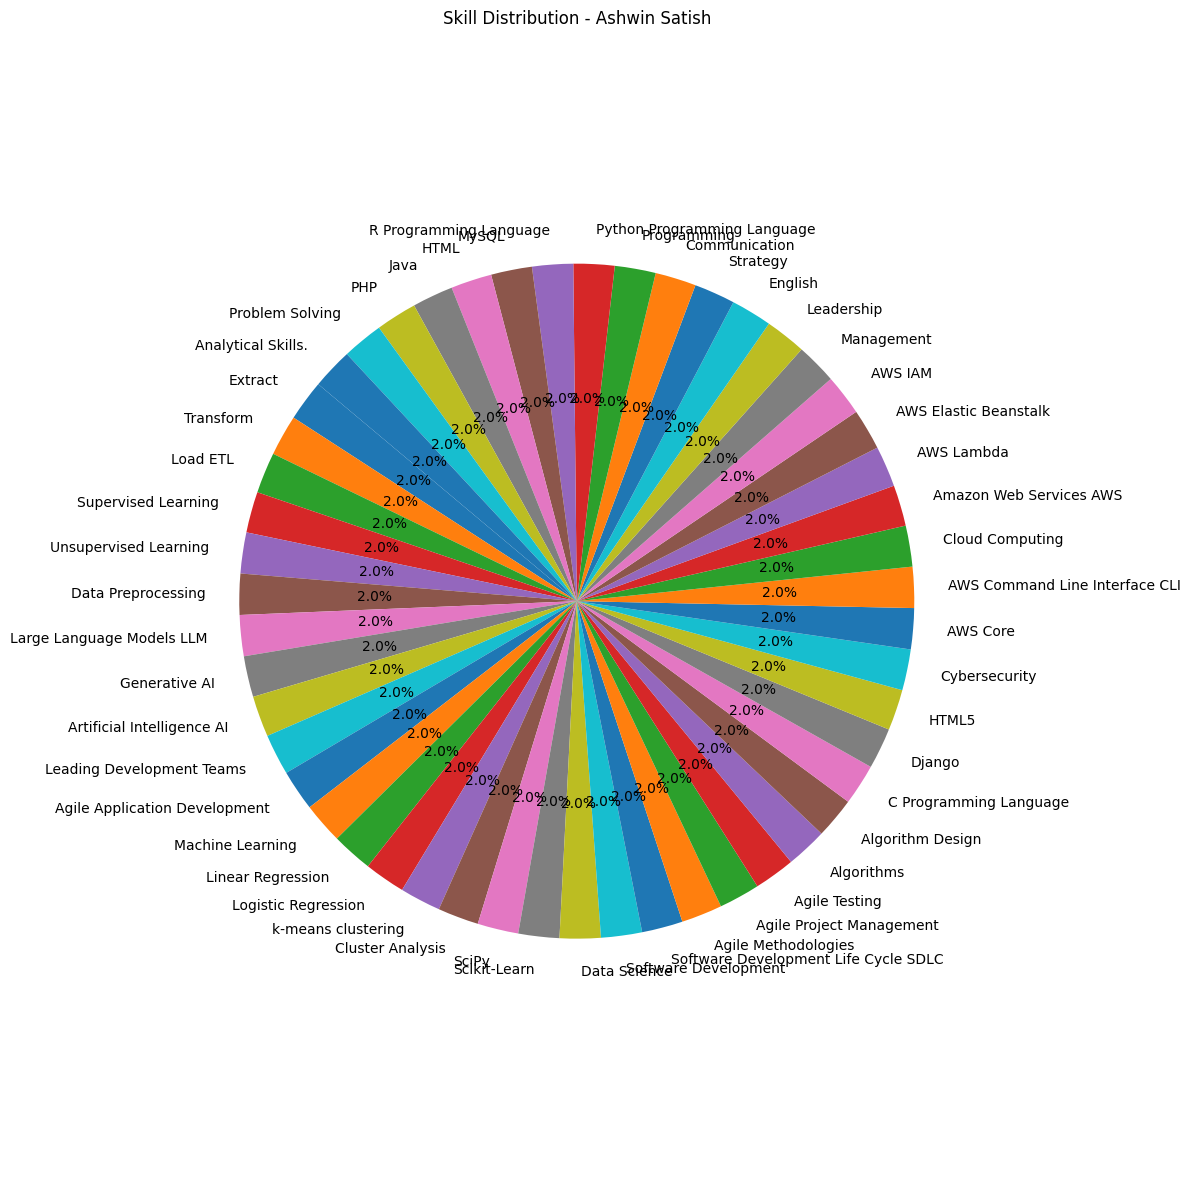

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Step 1: Load candidate profiles (use correct encoding if needed)
file_path = "Candidate_Dataset/candidates_profiles_cleaned.csv"  
candidates_df = pd.read_csv(file_path, encoding='latin1')

# Step 2: Extract and plot skills from the 'Skills' column
def plot_candidate_skills_pie(candidate_row):
    candidate_name = candidate_row["Name"]
    raw_skills = candidate_row["Skills"]
    
    if pd.isna(raw_skills):
        print(f"No skills found for {candidate_name}. Skipping...")
        return

    # Split skills
    skills = [s.strip() for s in re.split(r",|;", raw_skills) if s.strip()]
    
    # Count frequency (optional)
    skill_counts = {}
    for skill in skills:
        skill_counts[skill] = skill_counts.get(skill, 0) + 1

    # Plot pie chart
    plt.figure(figsize=(12, 12))
    plt.pie(skill_counts.values(), labels=skill_counts.keys(), autopct='%1.1f%%', startangle=140)
    plt.title(f"Skill Distribution - {candidate_name}")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# Step 3: Loop through all candidates and plot
for _, row in candidates_df.iterrows():
    plot_candidate_skills_pie(row)
